In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

42


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.46240 stdev: 0.14011
Best fitness: 0.74892 - size: (2, 13) - species 1 - id 73
Average adjusted fitness: 0.206
Mean genetic distance 2.898, standard deviation 0.451
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.087 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57828 stdev: 0.14295
Best fitness: 0.77922 - size: (3, 15) - species 6 - id 304
Average adjusted fitness: 0.317
Mean genetic distance 3.001, standard deviation 0.454
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 20.348 sec (20.217 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58942 stdev: 0.13964
Best fitness: 0.77922 - size: (3, 15) - species 15 - id 304
Average adjusted fitness: 0.304
Mean genetic distance 3.022, standard deviation 0.459
Population of 203 members in 34 species
Total extin

Population's average fitness: 0.70716 stdev: 0.17589
Best fitness: 0.82375 - size: (5, 17) - species 16 - id 1388
Average adjusted fitness: 0.490
Mean genetic distance 3.121, standard deviation 0.497
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 29.335 sec (25.559 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72100 stdev: 0.16954
Best fitness: 0.82375 - size: (5, 17) - species 16 - id 1388
Average adjusted fitness: 0.511
Mean genetic distance 3.142, standard deviation 0.508
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 27.869 sec (26.322 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71895 stdev: 0.15738
Best fitness: 0.82375 - size: (5, 17) - species 16 - id 1388
Average adjusted fitness: 0.512
Mean genetic distance 3.139, standard deviation 0.502
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 27.401 sec (26.869 average)

 

Population's average fitness: 0.70345 stdev: 0.16918
Best fitness: 0.85034 - size: (2, 13) - species 3 - id 468
Average adjusted fitness: 0.499
Mean genetic distance 3.092, standard deviation 0.532
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 25.423 sec (22.201 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68549 stdev: 0.18623
Best fitness: 0.85034 - size: (2, 13) - species 3 - id 468
Average adjusted fitness: 0.483
Mean genetic distance 3.099, standard deviation 0.519
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 33.903 sec (24.541 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71029 stdev: 0.16933
Best fitness: 0.85034 - size: (2, 13) - species 3 - id 468
Average adjusted fitness: 0.503
Mean genetic distance 3.109, standard deviation 0.524
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 30.299 sec (25.501 average)

 ****** R

Population's average fitness: 0.63662 stdev: 0.11258
Best fitness: 0.81138 - size: (7, 22) - species 13 - id 1529
Average adjusted fitness: 0.265
Mean genetic distance 3.194, standard deviation 0.512
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 22.610 sec (20.989 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62638 stdev: 0.12124
Best fitness: 0.81818 - size: (8, 24) - species 13 - id 1899
Average adjusted fitness: 0.250
Mean genetic distance 3.192, standard deviation 0.508
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 22.341 sec (21.278 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63021 stdev: 0.12337
Best fitness: 0.81818 - size: (8, 24) - species 13 - id 1899
Average adjusted fitness: 0.311
Mean genetic distance 3.173, standard deviation 0.505
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 22.280 sec (21.522 average)
nu

Population's average fitness: 0.59893 stdev: 0.10391
Best fitness: 0.79035 - size: (5, 18) - species 21 - id 1088
Average adjusted fitness: 0.235
Mean genetic distance 3.138, standard deviation 0.539
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 20.076 sec (18.966 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60243 stdev: 0.09907
Best fitness: 0.79035 - size: (5, 18) - species 21 - id 1088
Average adjusted fitness: 0.218
Mean genetic distance 3.148, standard deviation 0.533
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 20.496 sec (19.158 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60382 stdev: 0.09984
Best fitness: 0.79035 - size: (5, 18) - species 21 - id 1088
Average adjusted fitness: 0.214
Mean genetic distance 3.155, standard deviation 0.537
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 20.164 sec (19.269 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.44362 stdev: 0.20452
Best fitness: 0.85343 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.264
Mean genetic distance 2.884, standard deviation 0.456
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 17.810 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59730 stdev: 0.20171
Best fitness: 0.85343 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.430
Mean genetic distance 3.005, standard deviation 0.492
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 18.221 sec (18.016 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65739 stdev: 0.19201
Best fitness: 0.87384 - size: (2, 14) - species 20 - id 542
Average adjusted fitness: 0.431
Mean genetic distance 3.027, standard deviation 0.485
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 18.790 sec (18.

Population's average fitness: 0.60606 stdev: 0.08054
Best fitness: 0.72480 - size: (4, 18) - species 14 - id 1461
Average adjusted fitness: 0.268
Mean genetic distance 3.119, standard deviation 0.482
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 22.219 sec (20.095 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60815 stdev: 0.07116
Best fitness: 0.72480 - size: (4, 17) - species 8 - id 1588
Average adjusted fitness: 0.211
Mean genetic distance 3.126, standard deviation 0.466
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 22.255 sec (20.597 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61507 stdev: 0.07404
Best fitness: 0.72480 - size: (4, 17) - species 8 - id 1588
Average adjusted fitness: 0.261
Mean genetic distance 3.132, standard deviation 0.471
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 21.896 sec (20.972 average)

 **

Population's average fitness: 0.57235 stdev: 0.07620
Best fitness: 0.72171 - size: (3, 14) - species 22 - id 354
Average adjusted fitness: 0.217
Mean genetic distance 3.090, standard deviation 0.469
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 19.751 sec (18.619 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58156 stdev: 0.07237
Best fitness: 0.72171 - size: (3, 14) - species 22 - id 354
Average adjusted fitness: 0.225
Mean genetic distance 3.092, standard deviation 0.471
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 20.515 sec (18.998 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58337 stdev: 0.07229
Best fitness: 0.72171 - size: (3, 14) - species 22 - id 354
Average adjusted fitness: 0.177
Mean genetic distance 3.110, standard deviation 0.472
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 21.626 sec (19.436 average)

 *****

Population's average fitness: 0.61412 stdev: 0.08822
Best fitness: 0.77675 - size: (6, 21) - species 18 - id 1380
Average adjusted fitness: 0.232
Mean genetic distance 3.196, standard deviation 0.488
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 22.066 sec (21.546 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62643 stdev: 0.08500
Best fitness: 0.78912 - size: (7, 21) - species 18 - id 2005
Average adjusted fitness: 0.303
Mean genetic distance 3.194, standard deviation 0.482
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 23.332 sec (21.847 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62272 stdev: 0.08663
Best fitness: 0.78912 - size: (7, 21) - species 18 - id 2005
Average adjusted fitness: 0.262
Mean genetic distance 3.212, standard deviation 0.480
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 22.677 sec (22.072 average)
nu

Population's average fitness: 0.61418 stdev: 0.11508
Best fitness: 0.82066 - size: (4, 18) - species 35 - id 961
Average adjusted fitness: 0.373
Mean genetic distance 3.109, standard deviation 0.457
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 22.270 sec (19.680 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61609 stdev: 0.11542
Best fitness: 0.82066 - size: (4, 18) - species 35 - id 961
Average adjusted fitness: 0.254
Mean genetic distance 3.140, standard deviation 0.456
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 21.769 sec (19.941 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61773 stdev: 0.12199
Best fitness: 0.82066 - size: (4, 18) - species 35 - id 961
Average adjusted fitness: 0.382
Mean genetic distance 3.117, standard deviation 0.463
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 21.580 sec (20.123 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50442 stdev: 0.07844
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 91
Average adjusted fitness: 0.231
Mean genetic distance 2.883, standard deviation 0.478
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 17.151 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54641 stdev: 0.08131
Best fitness: 0.76747 - size: (2, 13) - species 11 - id 258
Average adjusted fitness: 0.248
Mean genetic distance 3.058, standard deviation 0.470
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 17.984 sec (17.568 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57718 stdev: 0.08860
Best fitness: 0.77860 - size: (4, 17) - species 10 - id 513
Average adjusted fitness: 0.210
Mean genetic distance 3.114, standard deviation 0.462
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 19.327 sec (18.

Population's average fitness: 0.65867 stdev: 0.14001
Best fitness: 0.82437 - size: (3, 16) - species 34 - id 1432
Average adjusted fitness: 0.380
Mean genetic distance 3.200, standard deviation 0.484
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 22.712 sec (20.563 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67704 stdev: 0.12633
Best fitness: 0.82437 - size: (3, 16) - species 34 - id 1432
Average adjusted fitness: 0.377
Mean genetic distance 3.202, standard deviation 0.472
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 21.850 sec (21.045 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66120 stdev: 0.13986
Best fitness: 0.82437 - size: (3, 16) - species 34 - id 1432
Average adjusted fitness: 0.414
Mean genetic distance 3.195, standard deviation 0.482
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 23.153 sec (21.556 average)

 

Population's average fitness: 0.61468 stdev: 0.13440
Best fitness: 0.86333 - size: (3, 15) - species 30 - id 372
Average adjusted fitness: 0.316
Mean genetic distance 3.116, standard deviation 0.466
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 19.917 sec (18.522 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63974 stdev: 0.12006
Best fitness: 0.86333 - size: (3, 15) - species 30 - id 372
Average adjusted fitness: 0.321
Mean genetic distance 3.131, standard deviation 0.465
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.440 sec (18.906 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65249 stdev: 0.11193
Best fitness: 0.86333 - size: (3, 15) - species 30 - id 372
Average adjusted fitness: 0.338
Mean genetic distance 3.187, standard deviation 0.471
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 20.482 sec (19.168 average)

 *****

Population's average fitness: 0.75002 stdev: 0.17129
Best fitness: 0.89858 - size: (6, 20) - species 27 - id 1700
Average adjusted fitness: 0.543
Mean genetic distance 3.202, standard deviation 0.527
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 23.037 sec (21.358 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.77245 stdev: 0.13730
Best fitness: 0.89858 - size: (6, 20) - species 27 - id 1700
Average adjusted fitness: 0.559
Mean genetic distance 3.202, standard deviation 0.504
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.756 sec (21.630 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.75318 stdev: 0.16250
Best fitness: 0.89858 - size: (6, 20) - species 27 - id 1700
Average adjusted fitness: 0.600
Mean genetic distance 3.232, standard deviation 0.500
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.809 sec (21.927 average)
nu

Population's average fitness: 0.58482 stdev: 0.07993
Best fitness: 0.71367 - size: (6, 19) - species 29 - id 1083
Average adjusted fitness: 0.217
Mean genetic distance 3.127, standard deviation 0.505
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 21.254 sec (19.573 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59503 stdev: 0.07645
Best fitness: 0.71367 - size: (6, 19) - species 29 - id 1083
Average adjusted fitness: 0.226
Mean genetic distance 3.119, standard deviation 0.500
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 20.917 sec (19.741 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59538 stdev: 0.07560
Best fitness: 0.71367 - size: (6, 19) - species 29 - id 1083
Average adjusted fitness: 0.229
Mean genetic distance 3.097, standard deviation 0.500
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.517 sec (20.049 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.51423 stdev: 0.08361
Best fitness: 0.66790 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.180
Mean genetic distance 2.779, standard deviation 0.456
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.578 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55885 stdev: 0.08186
Best fitness: 0.68584 - size: (2, 14) - species 6 - id 236
Average adjusted fitness: 0.211
Mean genetic distance 3.005, standard deviation 0.510
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.569 sec (18.073 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56678 stdev: 0.08017
Best fitness: 0.74397 - size: (3, 15) - species 18 - id 487
Average adjusted fitness: 0.272
Mean genetic distance 3.060, standard deviation 0.529
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 18.677 sec (18.

Population's average fitness: 0.59625 stdev: 0.08611
Best fitness: 0.79283 - size: (3, 15) - species 3 - id 794
Average adjusted fitness: 0.222
Mean genetic distance 3.121, standard deviation 0.506
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 21.596 sec (19.961 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59769 stdev: 0.08597
Best fitness: 0.79283 - size: (3, 15) - species 3 - id 794
Average adjusted fitness: 0.221
Mean genetic distance 3.108, standard deviation 0.484
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 21.714 sec (20.436 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60269 stdev: 0.08745
Best fitness: 0.79283 - size: (3, 15) - species 3 - id 794
Average adjusted fitness: 0.256
Mean genetic distance 3.111, standard deviation 0.498
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 21.402 sec (20.724 average)

 ******

Population's average fitness: 0.64512 stdev: 0.12332
Best fitness: 0.78726 - size: (5, 18) - species 29 - id 633
Average adjusted fitness: 0.372
Mean genetic distance 3.090, standard deviation 0.503
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 19.752 sec (18.612 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66987 stdev: 0.09936
Best fitness: 0.80334 - size: (6, 23) - species 4 - id 803
Average adjusted fitness: 0.379
Mean genetic distance 3.104, standard deviation 0.516
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 19.987 sec (18.887 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66379 stdev: 0.11019
Best fitness: 0.80334 - size: (6, 23) - species 4 - id 803
Average adjusted fitness: 0.378
Mean genetic distance 3.118, standard deviation 0.495
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 20.342 sec (19.130 average)

 ****** 

Population's average fitness: 0.63006 stdev: 0.12003
Best fitness: 0.81633 - size: (3, 17) - species 27 - id 920
Average adjusted fitness: 0.316
Mean genetic distance 3.195, standard deviation 0.465
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 20.922 sec (20.854 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63914 stdev: 0.11100
Best fitness: 0.81633 - size: (3, 17) - species 27 - id 920
Average adjusted fitness: 0.287
Mean genetic distance 3.203, standard deviation 0.464
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 22.068 sec (21.114 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63701 stdev: 0.10988
Best fitness: 0.81633 - size: (3, 17) - species 27 - id 920
Average adjusted fitness: 0.358
Mean genetic distance 3.213, standard deviation 0.464
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 22.773 sec (21.343 average)
numbe

Population's average fitness: 0.57771 stdev: 0.08482
Best fitness: 0.76809 - size: (3, 14) - species 24 - id 273
Average adjusted fitness: 0.230
Mean genetic distance 3.057, standard deviation 0.469
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 20.724 sec (19.625 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58924 stdev: 0.08199
Best fitness: 0.76809 - size: (3, 14) - species 24 - id 273
Average adjusted fitness: 0.230
Mean genetic distance 3.061, standard deviation 0.469
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 21.032 sec (19.801 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59530 stdev: 0.08092
Best fitness: 0.76809 - size: (3, 14) - species 24 - id 273
Average adjusted fitness: 0.230
Mean genetic distance 3.071, standard deviation 0.471
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 20.746 sec (19.906 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51785 stdev: 0.08711
Best fitness: 0.67532 - size: (2, 13) - species 2 - id 68
Average adjusted fitness: 0.189
Mean genetic distance 2.914, standard deviation 0.483
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.314 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55447 stdev: 0.07945
Best fitness: 0.71305 - size: (3, 15) - species 15 - id 315
Average adjusted fitness: 0.189
Mean genetic distance 2.999, standard deviation 0.487
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 18.154 sec (17.734 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56756 stdev: 0.08294
Best fitness: 0.72356 - size: (4, 16) - species 9 - id 452
Average adjusted fitness: 0.209
Mean genetic distance 3.047, standard deviation 0.490
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 19.198 sec (18.2

Population's average fitness: 0.64585 stdev: 0.11163
Best fitness: 0.75077 - size: (5, 18) - species 27 - id 792
Average adjusted fitness: 0.390
Mean genetic distance 3.102, standard deviation 0.476
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 21.991 sec (20.337 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63809 stdev: 0.12201
Best fitness: 0.75077 - size: (5, 18) - species 27 - id 792
Average adjusted fitness: 0.375
Mean genetic distance 3.108, standard deviation 0.472
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 22.220 sec (20.855 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64052 stdev: 0.12254
Best fitness: 0.75077 - size: (5, 18) - species 27 - id 792
Average adjusted fitness: 0.328
Mean genetic distance 3.112, standard deviation 0.474
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 22.443 sec (21.238 average)

 ***

Population's average fitness: 0.60770 stdev: 0.12557
Best fitness: 0.74583 - size: (3, 14) - species 4 - id 638
Average adjusted fitness: 0.300
Mean genetic distance 3.112, standard deviation 0.546
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 20.012 sec (18.708 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60853 stdev: 0.13075
Best fitness: 0.75015 - size: (4, 16) - species 28 - id 811
Average adjusted fitness: 0.324
Mean genetic distance 3.109, standard deviation 0.537
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 20.583 sec (19.083 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63447 stdev: 0.11176
Best fitness: 0.75015 - size: (4, 16) - species 28 - id 811
Average adjusted fitness: 0.391
Mean genetic distance 3.107, standard deviation 0.542
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 20.775 sec (19.365 average)

 ******

Population's average fitness: 0.60120 stdev: 0.08756
Best fitness: 0.78169 - size: (3, 16) - species 4 - id 828
Average adjusted fitness: 0.211
Mean genetic distance 3.094, standard deviation 0.482
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 23.141 sec (21.274 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60219 stdev: 0.09495
Best fitness: 0.78169 - size: (3, 16) - species 4 - id 828
Average adjusted fitness: 0.218
Mean genetic distance 3.109, standard deviation 0.476
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 21.883 sec (21.481 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60206 stdev: 0.09538
Best fitness: 0.78169 - size: (3, 16) - species 4 - id 828
Average adjusted fitness: 0.245
Mean genetic distance 3.142, standard deviation 0.490
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 22.599 sec (21.659 average)
number o

Population's average fitness: 0.62145 stdev: 0.12490
Best fitness: 0.76376 - size: (4, 17) - species 17 - id 849
Average adjusted fitness: 0.298
Mean genetic distance 3.102, standard deviation 0.494
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 21.520 sec (19.706 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62721 stdev: 0.11557
Best fitness: 0.76376 - size: (4, 17) - species 17 - id 849
Average adjusted fitness: 0.342
Mean genetic distance 3.114, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 22.147 sec (20.011 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62261 stdev: 0.12631
Best fitness: 0.76376 - size: (4, 17) - species 17 - id 849
Average adjusted fitness: 0.313
Mean genetic distance 3.114, standard deviation 0.483
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.876 sec (20.218 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.53762 stdev: 0.14572
Best fitness: 0.75510 - size: (2, 13) - species 3 - id 192
Average adjusted fitness: 0.297
Mean genetic distance 2.811, standard deviation 0.437
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.110 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62941 stdev: 0.13344
Best fitness: 0.81200 - size: (2, 12) - species 7 - id 248
Average adjusted fitness: 0.417
Mean genetic distance 2.905, standard deviation 0.457
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 17.930 sec (17.520 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63201 stdev: 0.13349
Best fitness: 0.81200 - size: (2, 12) - species 7 - id 248
Average adjusted fitness: 0.388
Mean genetic distance 2.968, standard deviation 0.454
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.447 sec (18.1

Population's average fitness: 0.60115 stdev: 0.09860
Best fitness: 0.77860 - size: (4, 17) - species 5 - id 1302
Average adjusted fitness: 0.237
Mean genetic distance 3.171, standard deviation 0.502
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 21.508 sec (20.123 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61402 stdev: 0.09294
Best fitness: 0.77860 - size: (4, 17) - species 5 - id 1302
Average adjusted fitness: 0.246
Mean genetic distance 3.158, standard deviation 0.498
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 21.503 sec (20.551 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61437 stdev: 0.09823
Best fitness: 0.77860 - size: (4, 17) - species 5 - id 1302
Average adjusted fitness: 0.243
Mean genetic distance 3.192, standard deviation 0.507
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 22.988 sec (21.002 average)

 ***

Population's average fitness: 0.57815 stdev: 0.09818
Best fitness: 0.75696 - size: (3, 16) - species 11 - id 454
Average adjusted fitness: 0.269
Mean genetic distance 3.010, standard deviation 0.454
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 20.199 sec (18.650 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59750 stdev: 0.09047
Best fitness: 0.75943 - size: (5, 20) - species 32 - id 788
Average adjusted fitness: 0.200
Mean genetic distance 2.995, standard deviation 0.456
Population of 209 members in 32 species
Total extinctions: 0
Generation time: 21.282 sec (19.176 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59820 stdev: 0.09579
Best fitness: 0.77551 - size: (4, 18) - species 11 - id 972
Average adjusted fitness: 0.206
Mean genetic distance 3.011, standard deviation 0.452
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 21.931 sec (19.635 average)

 *****

Population's average fitness: 0.68565 stdev: 0.08814
Best fitness: 0.78850 - size: (4, 16) - species 19 - id 795
Average adjusted fitness: 0.385
Mean genetic distance 3.138, standard deviation 0.470
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 22.369 sec (21.358 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67932 stdev: 0.10099
Best fitness: 0.78850 - size: (4, 16) - species 19 - id 795
Average adjusted fitness: 0.379
Mean genetic distance 3.123, standard deviation 0.479
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 21.919 sec (21.572 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68238 stdev: 0.10379
Best fitness: 0.78850 - size: (4, 16) - species 19 - id 795
Average adjusted fitness: 0.380
Mean genetic distance 3.124, standard deviation 0.484
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 22.859 sec (21.862 average)
numbe

Population's average fitness: 0.65819 stdev: 0.09968
Best fitness: 0.78541 - size: (4, 18) - species 1 - id 1149
Average adjusted fitness: 0.351
Mean genetic distance 3.109, standard deviation 0.509
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 21.324 sec (19.861 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65525 stdev: 0.10515
Best fitness: 0.78541 - size: (4, 18) - species 1 - id 1149
Average adjusted fitness: 0.352
Mean genetic distance 3.151, standard deviation 0.519
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 21.255 sec (20.035 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65930 stdev: 0.10366
Best fitness: 0.78541 - size: (4, 18) - species 1 - id 1149
Average adjusted fitness: 0.353
Mean genetic distance 3.139, standard deviation 0.516
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.356 sec (20.182 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49887 stdev: 0.04906
Best fitness: 0.66976 - size: (2, 13) - species 1 - id 25
Average adjusted fitness: 0.134
Mean genetic distance 2.958, standard deviation 0.499
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 17.305 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51891 stdev: 0.05349
Best fitness: 0.68955 - size: (3, 14) - species 1 - id 340
Average adjusted fitness: 0.124
Mean genetic distance 3.020, standard deviation 0.499
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.731 sec (18.018 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53834 stdev: 0.05244
Best fitness: 0.68955 - size: (3, 14) - species 4 - id 340
Average adjusted fitness: 0.144
Mean genetic distance 3.051, standard deviation 0.510
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 19.766 sec (18.60

Population's average fitness: 0.61443 stdev: 0.08523
Best fitness: 0.76129 - size: (4, 19) - species 21 - id 1133
Average adjusted fitness: 0.203
Mean genetic distance 3.133, standard deviation 0.492
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 21.915 sec (20.166 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61391 stdev: 0.08847
Best fitness: 0.76129 - size: (4, 19) - species 21 - id 1133
Average adjusted fitness: 0.216
Mean genetic distance 3.136, standard deviation 0.492
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 22.435 sec (20.652 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62345 stdev: 0.08766
Best fitness: 0.77242 - size: (8, 27) - species 38 - id 1629
Average adjusted fitness: 0.229
Mean genetic distance 3.164, standard deviation 0.490
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 21.852 sec (20.920 average)

 

Population's average fitness: 0.60533 stdev: 0.08411
Best fitness: 0.81756 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.248
Mean genetic distance 3.116, standard deviation 0.482
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 19.504 sec (18.775 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60337 stdev: 0.09742
Best fitness: 0.81756 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.294
Mean genetic distance 3.145, standard deviation 0.480
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.740 sec (19.168 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60380 stdev: 0.10111
Best fitness: 0.81756 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.315
Mean genetic distance 3.167, standard deviation 0.506
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 20.944 sec (19.464 average)

 ****** Runn

Population's average fitness: 0.59710 stdev: 0.08121
Best fitness: 0.79344 - size: (7, 21) - species 32 - id 1411
Average adjusted fitness: 0.194
Mean genetic distance 3.180, standard deviation 0.479
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 23.044 sec (21.709 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60302 stdev: 0.07806
Best fitness: 0.79344 - size: (7, 21) - species 32 - id 1411
Average adjusted fitness: 0.250
Mean genetic distance 3.208, standard deviation 0.476
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 23.346 sec (22.022 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59997 stdev: 0.08043
Best fitness: 0.79344 - size: (7, 21) - species 32 - id 1411
Average adjusted fitness: 0.202
Mean genetic distance 3.208, standard deviation 0.482
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 23.670 sec (22.350 average)
nu

Population's average fitness: 0.57227 stdev: 0.07015
Best fitness: 0.76129 - size: (3, 15) - species 9 - id 951
Average adjusted fitness: 0.218
Mean genetic distance 3.129, standard deviation 0.486
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 20.818 sec (19.765 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57409 stdev: 0.07331
Best fitness: 0.76129 - size: (3, 15) - species 9 - id 951
Average adjusted fitness: 0.208
Mean genetic distance 3.144, standard deviation 0.483
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 21.535 sec (19.986 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58288 stdev: 0.07382
Best fitness: 0.76129 - size: (3, 15) - species 9 - id 951
Average adjusted fitness: 0.162
Mean genetic distance 3.161, standard deviation 0.478
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 21.324 sec (20.135 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47343 stdev: 0.09140
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.171
Mean genetic distance 2.855, standard deviation 0.407
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.530 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54500 stdev: 0.08802
Best fitness: 0.72233 - size: (2, 12) - species 2 - id 360
Average adjusted fitness: 0.269
Mean genetic distance 2.908, standard deviation 0.415
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.327 sec (17.929 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55823 stdev: 0.08622
Best fitness: 0.72233 - size: (2, 12) - species 2 - id 360
Average adjusted fitness: 0.240
Mean genetic distance 2.963, standard deviation 0.446
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 19.406 sec (18.4

Population's average fitness: 0.60649 stdev: 0.09615
Best fitness: 0.76252 - size: (4, 15) - species 34 - id 1131
Average adjusted fitness: 0.372
Mean genetic distance 3.229, standard deviation 0.476
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 22.758 sec (20.227 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61401 stdev: 0.09024
Best fitness: 0.76252 - size: (4, 15) - species 30 - id 1131
Average adjusted fitness: 0.253
Mean genetic distance 3.218, standard deviation 0.471
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 22.389 sec (20.747 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61514 stdev: 0.09485
Best fitness: 0.77551 - size: (6, 21) - species 32 - id 1736
Average adjusted fitness: 0.256
Mean genetic distance 3.212, standard deviation 0.471
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 22.505 sec (21.160 average)

 

Population's average fitness: 0.72555 stdev: 0.14743
Best fitness: 0.87137 - size: (2, 13) - species 7 - id 57
Average adjusted fitness: 0.518
Mean genetic distance 3.096, standard deviation 0.477
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 20.207 sec (19.015 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.73574 stdev: 0.13601
Best fitness: 0.87137 - size: (2, 13) - species 41 - id 57
Average adjusted fitness: 0.527
Mean genetic distance 3.101, standard deviation 0.469
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 20.626 sec (19.337 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.73337 stdev: 0.14850
Best fitness: 0.88559 - size: (4, 14) - species 29 - id 885
Average adjusted fitness: 0.526
Mean genetic distance 3.125, standard deviation 0.478
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 20.869 sec (19.592 average)

 ****** R

Population's average fitness: 0.65465 stdev: 0.11660
Best fitness: 0.83550 - size: (5, 20) - species 19 - id 1117
Average adjusted fitness: 0.249
Mean genetic distance 3.161, standard deviation 0.469
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 23.356 sec (22.166 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66345 stdev: 0.11356
Best fitness: 0.83550 - size: (5, 20) - species 19 - id 1117
Average adjusted fitness: 0.329
Mean genetic distance 3.184, standard deviation 0.467
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 23.391 sec (22.431 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67857 stdev: 0.10576
Best fitness: 0.84972 - size: (7, 21) - species 31 - id 2061
Average adjusted fitness: 0.402
Mean genetic distance 3.182, standard deviation 0.469
Population of 193 members in 46 species
Total extinctions: 0
Generation time: 22.482 sec (22.502 average)
nu

Population's average fitness: 0.56158 stdev: 0.06005
Best fitness: 0.68893 - size: (5, 19) - species 10 - id 976
Average adjusted fitness: 0.169
Mean genetic distance 3.089, standard deviation 0.507
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 21.452 sec (19.851 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56530 stdev: 0.06533
Best fitness: 0.68893 - size: (5, 19) - species 10 - id 976
Average adjusted fitness: 0.186
Mean genetic distance 3.119, standard deviation 0.502
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 21.740 sec (20.087 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57329 stdev: 0.06401
Best fitness: 0.70377 - size: (6, 21) - species 1 - id 1422
Average adjusted fitness: 0.169
Mean genetic distance 3.121, standard deviation 0.513
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 21.319 sec (20.224 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51770 stdev: 0.08619
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 136
Average adjusted fitness: 0.185
Mean genetic distance 2.827, standard deviation 0.464
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.550 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56049 stdev: 0.08774
Best fitness: 0.73840 - size: (3, 15) - species 7 - id 226
Average adjusted fitness: 0.207
Mean genetic distance 3.013, standard deviation 0.491
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 18.207 sec (17.878 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57707 stdev: 0.09247
Best fitness: 0.75139 - size: (4, 17) - species 22 - id 530
Average adjusted fitness: 0.225
Mean genetic distance 3.096, standard deviation 0.477
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 19.493 sec (18.

Population's average fitness: 0.62236 stdev: 0.08889
Best fitness: 0.77056 - size: (7, 20) - species 15 - id 1239
Average adjusted fitness: 0.291
Mean genetic distance 3.157, standard deviation 0.530
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 21.608 sec (19.772 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61956 stdev: 0.09386
Best fitness: 0.77056 - size: (7, 20) - species 15 - id 1239
Average adjusted fitness: 0.227
Mean genetic distance 3.169, standard deviation 0.528
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.631 sec (20.246 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61804 stdev: 0.08838
Best fitness: 0.77056 - size: (7, 20) - species 15 - id 1239
Average adjusted fitness: 0.205
Mean genetic distance 3.172, standard deviation 0.522
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 22.584 sec (20.699 average)

 

Population's average fitness: 0.61151 stdev: 0.13343
Best fitness: 0.77365 - size: (3, 14) - species 18 - id 540
Average adjusted fitness: 0.310
Mean genetic distance 3.022, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 19.170 sec (18.150 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63783 stdev: 0.11937
Best fitness: 0.77365 - size: (3, 14) - species 18 - id 540
Average adjusted fitness: 0.324
Mean genetic distance 3.083, standard deviation 0.477
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.012 sec (18.523 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64276 stdev: 0.12614
Best fitness: 0.77365 - size: (3, 14) - species 18 - id 540
Average adjusted fitness: 0.357
Mean genetic distance 3.091, standard deviation 0.484
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 20.386 sec (18.833 average)

 *****

Population's average fitness: 0.59454 stdev: 0.09000
Best fitness: 0.75696 - size: (6, 22) - species 10 - id 1659
Average adjusted fitness: 0.242
Mean genetic distance 3.150, standard deviation 0.485
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 22.026 sec (20.786 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59413 stdev: 0.08924
Best fitness: 0.75696 - size: (6, 22) - species 10 - id 1659
Average adjusted fitness: 0.218
Mean genetic distance 3.170, standard deviation 0.484
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 21.970 sec (21.077 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59754 stdev: 0.08848
Best fitness: 0.75696 - size: (6, 22) - species 10 - id 1659
Average adjusted fitness: 0.227
Mean genetic distance 3.158, standard deviation 0.471
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 21.889 sec (21.237 average)
nu

Population's average fitness: 0.70399 stdev: 0.17247
Best fitness: 0.86395 - size: (6, 22) - species 31 - id 961
Average adjusted fitness: 0.525
Mean genetic distance 3.078, standard deviation 0.528
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 21.575 sec (19.543 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71866 stdev: 0.15875
Best fitness: 0.86395 - size: (6, 22) - species 31 - id 961
Average adjusted fitness: 0.518
Mean genetic distance 3.059, standard deviation 0.533
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.972 sec (19.847 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70409 stdev: 0.15786
Best fitness: 0.87384 - size: (7, 24) - species 31 - id 1378
Average adjusted fitness: 0.506
Mean genetic distance 3.052, standard deviation 0.528
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.148 sec (19.991 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.53302 stdev: 0.13759
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 176
Average adjusted fitness: 0.255
Mean genetic distance 2.929, standard deviation 0.482
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 17.766 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58177 stdev: 0.13858
Best fitness: 0.77180 - size: (3, 15) - species 7 - id 268
Average adjusted fitness: 0.290
Mean genetic distance 3.021, standard deviation 0.499
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 18.602 sec (18.184 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63361 stdev: 0.11044
Best fitness: 0.77180 - size: (3, 15) - species 5 - id 268
Average adjusted fitness: 0.325
Mean genetic distance 3.055, standard deviation 0.502
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 19.946 sec (18.7

Population's average fitness: 0.58386 stdev: 0.06976
Best fitness: 0.72109 - size: (5, 17) - species 3 - id 1259
Average adjusted fitness: 0.185
Mean genetic distance 3.141, standard deviation 0.492
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 22.025 sec (20.489 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59145 stdev: 0.06723
Best fitness: 0.72109 - size: (5, 17) - species 3 - id 1259
Average adjusted fitness: 0.183
Mean genetic distance 3.144, standard deviation 0.497
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.712 sec (20.988 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59051 stdev: 0.07047
Best fitness: 0.72109 - size: (5, 17) - species 3 - id 1259
Average adjusted fitness: 0.217
Mean genetic distance 3.150, standard deviation 0.499
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.951 sec (21.424 average)

 ***

Population's average fitness: 0.60960 stdev: 0.15616
Best fitness: 0.86704 - size: (4, 17) - species 27 - id 528
Average adjusted fitness: 0.374
Mean genetic distance 3.028, standard deviation 0.482
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 20.215 sec (18.875 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61576 stdev: 0.15620
Best fitness: 0.86889 - size: (4, 18) - species 27 - id 840
Average adjusted fitness: 0.347
Mean genetic distance 3.057, standard deviation 0.477
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 21.306 sec (19.361 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63340 stdev: 0.15871
Best fitness: 0.90414 - size: (4, 19) - species 27 - id 986
Average adjusted fitness: 0.425
Mean genetic distance 3.063, standard deviation 0.483
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.100 sec (19.651 average)

 *****

Population's average fitness: 0.58958 stdev: 0.07868
Best fitness: 0.77180 - size: (6, 21) - species 25 - id 1838
Average adjusted fitness: 0.195
Mean genetic distance 3.156, standard deviation 0.502
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 22.496 sec (21.218 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59546 stdev: 0.07694
Best fitness: 0.77180 - size: (6, 21) - species 25 - id 1838
Average adjusted fitness: 0.200
Mean genetic distance 3.179, standard deviation 0.478
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 22.815 sec (21.542 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59220 stdev: 0.07993
Best fitness: 0.77675 - size: (5, 19) - species 15 - id 2069
Average adjusted fitness: 0.199
Mean genetic distance 3.203, standard deviation 0.480
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 23.272 sec (21.777 average)
nu

Population's average fitness: 0.57917 stdev: 0.09688
Best fitness: 0.71738 - size: (3, 15) - species 3 - id 1005
Average adjusted fitness: 0.233
Mean genetic distance 3.083, standard deviation 0.499
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 19.856 sec (18.158 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57990 stdev: 0.09960
Best fitness: 0.72975 - size: (5, 18) - species 25 - id 1190
Average adjusted fitness: 0.201
Mean genetic distance 3.125, standard deviation 0.512
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 20.178 sec (18.411 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57533 stdev: 0.10263
Best fitness: 0.72975 - size: (7, 19) - species 1 - id 1323
Average adjusted fitness: 0.243
Mean genetic distance 3.126, standard deviation 0.519
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 20.595 sec (18.653 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49122 stdev: 0.05918
Best fitness: 0.63142 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.200
Mean genetic distance 2.934, standard deviation 0.485
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 15.780 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53747 stdev: 0.05108
Best fitness: 0.65492 - size: (2, 13) - species 19 - id 323
Average adjusted fitness: 0.149
Mean genetic distance 3.035, standard deviation 0.515
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 16.937 sec (16.359 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54309 stdev: 0.06244
Best fitness: 0.69079 - size: (3, 16) - species 8 - id 405
Average adjusted fitness: 0.216
Mean genetic distance 3.044, standard deviation 0.486
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 17.936 sec (16.

Population's average fitness: 0.62432 stdev: 0.12711
Best fitness: 0.79283 - size: (4, 17) - species 35 - id 1471
Average adjusted fitness: 0.325
Mean genetic distance 3.071, standard deviation 0.469
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 19.659 sec (18.632 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63974 stdev: 0.12924
Best fitness: 0.79283 - size: (4, 17) - species 35 - id 1471
Average adjusted fitness: 0.350
Mean genetic distance 3.076, standard deviation 0.470
Population of 209 members in 41 species
Total extinctions: 0
Generation time: 21.214 sec (19.188 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62646 stdev: 0.13421
Best fitness: 0.79283 - size: (4, 17) - species 2 - id 1471
Average adjusted fitness: 0.314
Mean genetic distance 3.098, standard deviation 0.471
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 20.869 sec (19.562 average)

 *

Population's average fitness: 0.64618 stdev: 0.11678
Best fitness: 0.82437 - size: (4, 17) - species 16 - id 682
Average adjusted fitness: 0.370
Mean genetic distance 3.188, standard deviation 0.493
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 18.801 sec (17.433 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64868 stdev: 0.11297
Best fitness: 0.82437 - size: (4, 17) - species 2 - id 682
Average adjusted fitness: 0.396
Mean genetic distance 3.201, standard deviation 0.485
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 19.071 sec (17.761 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66793 stdev: 0.11615
Best fitness: 0.82437 - size: (4, 17) - species 37 - id 682
Average adjusted fitness: 0.381
Mean genetic distance 3.206, standard deviation 0.475
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 19.838 sec (18.107 average)

 ******

Population's average fitness: 0.69233 stdev: 0.14151
Best fitness: 0.88745 - size: (4, 16) - species 31 - id 1828
Average adjusted fitness: 0.475
Mean genetic distance 3.158, standard deviation 0.476
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 21.474 sec (19.441 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68658 stdev: 0.15026
Best fitness: 0.88745 - size: (4, 16) - species 31 - id 1828
Average adjusted fitness: 0.419
Mean genetic distance 3.179, standard deviation 0.470
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 20.595 sec (19.730 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70328 stdev: 0.13343
Best fitness: 0.88745 - size: (4, 16) - species 31 - id 1828
Average adjusted fitness: 0.448
Mean genetic distance 3.202, standard deviation 0.473
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 21.506 sec (20.102 average)
nu

Population's average fitness: 0.65333 stdev: 0.13264
Best fitness: 0.85220 - size: (4, 14) - species 24 - id 698
Average adjusted fitness: 0.342
Mean genetic distance 3.179, standard deviation 0.503
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 18.813 sec (17.710 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66084 stdev: 0.12993
Best fitness: 0.85220 - size: (4, 14) - species 24 - id 698
Average adjusted fitness: 0.354
Mean genetic distance 3.167, standard deviation 0.511
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.338 sec (17.914 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66203 stdev: 0.13399
Best fitness: 0.85220 - size: (4, 14) - species 24 - id 698
Average adjusted fitness: 0.405
Mean genetic distance 3.135, standard deviation 0.505
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.756 sec (18.118 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48262 stdev: 0.09700
Best fitness: 0.77056 - size: (2, 13) - species 3 - id 35
Average adjusted fitness: 0.265
Mean genetic distance 2.824, standard deviation 0.447
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 15.871 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53917 stdev: 0.10038
Best fitness: 0.77056 - size: (2, 13) - species 3 - id 35
Average adjusted fitness: 0.287
Mean genetic distance 2.867, standard deviation 0.465
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 16.832 sec (16.352 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57358 stdev: 0.10387
Best fitness: 0.79654 - size: (3, 15) - species 4 - id 480
Average adjusted fitness: 0.272
Mean genetic distance 2.897, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.654 sec (16.786

Population's average fitness: 0.64828 stdev: 0.12291
Best fitness: 0.81200 - size: (4, 16) - species 21 - id 783
Average adjusted fitness: 0.351
Mean genetic distance 3.116, standard deviation 0.494
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 19.846 sec (18.322 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64037 stdev: 0.12929
Best fitness: 0.82498 - size: (4, 17) - species 21 - id 1676
Average adjusted fitness: 0.339
Mean genetic distance 3.115, standard deviation 0.507
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 20.178 sec (18.766 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66252 stdev: 0.11595
Best fitness: 0.82498 - size: (4, 17) - species 21 - id 1676
Average adjusted fitness: 0.359
Mean genetic distance 3.106, standard deviation 0.503
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 19.985 sec (19.084 average)

 *

Population's average fitness: 0.58872 stdev: 0.08991
Best fitness: 0.76252 - size: (3, 14) - species 13 - id 701
Average adjusted fitness: 0.291
Mean genetic distance 3.007, standard deviation 0.452
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 16.239 sec (16.079 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58610 stdev: 0.10298
Best fitness: 0.76252 - size: (3, 14) - species 13 - id 701
Average adjusted fitness: 0.258
Mean genetic distance 3.046, standard deviation 0.484
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 16.928 sec (16.249 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58992 stdev: 0.10206
Best fitness: 0.76252 - size: (3, 14) - species 13 - id 701
Average adjusted fitness: 0.244
Mean genetic distance 3.052, standard deviation 0.491
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.401 sec (16.441 average)

 *****

Population's average fitness: 0.77231 stdev: 0.24514
Best fitness: 0.95300 - size: (5, 19) - species 23 - id 1292
Average adjusted fitness: 0.625
Mean genetic distance 3.124, standard deviation 0.477
Population of 214 members in 47 species
Total extinctions: 0
Generation time: 18.068 sec (17.902 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75717 stdev: 0.25127
Best fitness: 0.95300 - size: (5, 19) - species 23 - id 1292
Average adjusted fitness: 0.657
Mean genetic distance 3.119, standard deviation 0.469
Population of 209 members in 48 species
Total extinctions: 0
Generation time: 18.586 sec (17.831 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76203 stdev: 0.24370
Best fitness: 0.95300 - size: (5, 19) - species 23 - id 1292
Average adjusted fitness: 0.624
Mean genetic distance 3.139, standard deviation 0.457
Population of 208 members in 48 species
Total extinctions: 0
Generation time: 18.205 sec (17.943 average)
nu

Population's average fitness: 0.60604 stdev: 0.07895
Best fitness: 0.72604 - size: (4, 18) - species 11 - id 1102
Average adjusted fitness: 0.262
Mean genetic distance 3.038, standard deviation 0.467
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 16.977 sec (15.802 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61197 stdev: 0.07645
Best fitness: 0.72604 - size: (4, 18) - species 11 - id 1102
Average adjusted fitness: 0.276
Mean genetic distance 3.097, standard deviation 0.489
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 17.438 sec (16.006 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60828 stdev: 0.07905
Best fitness: 0.72604 - size: (4, 18) - species 11 - id 1102
Average adjusted fitness: 0.284
Mean genetic distance 3.166, standard deviation 0.495
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 17.938 sec (16.221 average)

 **

Population's average fitness: 0.50158 stdev: 0.05918
Best fitness: 0.73160 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.220
Mean genetic distance 2.895, standard deviation 0.491
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.981 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53372 stdev: 0.06704
Best fitness: 0.73160 - size: (2, 13) - species 3 - id 103
Average adjusted fitness: 0.186
Mean genetic distance 2.989, standard deviation 0.497
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 15.017 sec (14.499 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54689 stdev: 0.07139
Best fitness: 0.73160 - size: (2, 13) - species 17 - id 103
Average adjusted fitness: 0.159
Mean genetic distance 2.978, standard deviation 0.518
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.535 sec (14.844 average)

 ****** Running generatio

Population's average fitness: 0.61726 stdev: 0.09076
Best fitness: 0.75634 - size: (3, 17) - species 11 - id 1484
Average adjusted fitness: 0.250
Mean genetic distance 3.094, standard deviation 0.515
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 16.551 sec (16.047 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62142 stdev: 0.08897
Best fitness: 0.76252 - size: (7, 25) - species 20 - id 1651
Average adjusted fitness: 0.215
Mean genetic distance 3.132, standard deviation 0.506
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.164 sec (16.362 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61701 stdev: 0.09539
Best fitness: 0.79901 - size: (4, 20) - species 28 - id 1802
Average adjusted fitness: 0.276
Mean genetic distance 3.115, standard deviation 0.510
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 17.329 sec (16.625 average)

 

Population's average fitness: 0.58347 stdev: 0.09268
Best fitness: 0.75015 - size: (5, 16) - species 13 - id 575
Average adjusted fitness: 0.213
Mean genetic distance 3.071, standard deviation 0.459
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 16.702 sec (15.209 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59285 stdev: 0.09692
Best fitness: 0.75015 - size: (5, 16) - species 13 - id 575
Average adjusted fitness: 0.294
Mean genetic distance 3.105, standard deviation 0.455
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 16.515 sec (15.470 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59402 stdev: 0.10173
Best fitness: 0.75015 - size: (5, 16) - species 13 - id 575
Average adjusted fitness: 0.220
Mean genetic distance 3.117, standard deviation 0.469
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 16.696 sec (15.674 average)

 *****

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8166666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  0  1]
 [ 0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  2  0 16  0  0  0  1]
 [ 0  0  0  0  0  2 18  0  1  0]
 [ 0  2  0  5  3  0  0 19  5  1]
 [ 0  8  0  0  0  0  0  0 11  1]
 [ 0  0  0  0  0  0  0  0  0 14]]


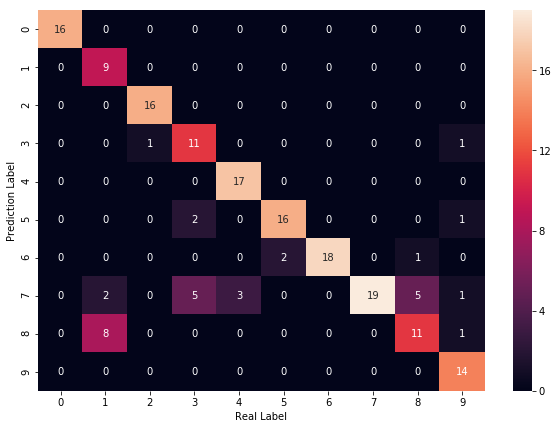

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:24 index:[5] real:5
#1 min_error:26 index:[3] real:2
#2 min_error:28 index:[7] real:8
#3 min_error:6 index:[0] real:0
#4 min_error:27 index:[1] real:1
#5 min_error:13 index:[7] real:7
#6 min_error:8 index:[6] real:6
#7 min_error:19 index:[3] real:3
#8 min_error:11 index:[2] real:2
#9 min_error:25 index:[1] real:1
#10 min_error:25 index:[7] real:7
#11 min_error:24 index:[7] real:4
#12 min_error:18 index:[6] real:6
#13 min_error:22 index:[3] real:3
#14 min_error:27 index:[1] real:1
#15 min_error:29 index:[3] real:3
#16 min_error:26 index:[7] real:9
#17 min_error:26 index:[1] real:1
#18 min_error:14 index:[7] real:7
#19 min_error:13 index:[6] real:6
#20 min_error:24 index:[8] real:8
#21 min_error:17 index:[4] real:4
#22 min_error:17 index:[3] real:3
#23 min_error:29 index:[1] real:1
#24 min_error:19 index:[4] real:4
#25 min_error:9 index:[0] real:0
#26 min_error:9 index:[5] real:5
#27 min_error:19 index:[3] real:3
#28 min_error:25 index:[6] real:6
#29 min_error:23 index:[9] r

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8775510204081632
Avg Base Learner:0.8015275200989487


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.06111111111111111
Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.12777777777777777
Accuracy on training set: 0.2111111111111111
Accuracy on training set: 0.3
Accuracy on training set: 0.4
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.4388888888888889
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.40555555555555556
Accuracy on training set: 0.43333333333333335
Accuracy on training set: 0.4111111111111111
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.55
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6
Accuracy on train

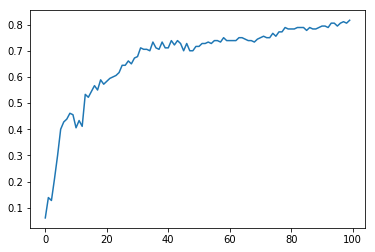

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.06111111111111111,
 0.1388888888888889,
 0.12777777777777777,
 0.2111111111111111,
 0.3,
 0.4,
 0.42777777777777776,
 0.4388888888888889,
 0.46111111111111114,
 0.45555555555555555,
 0.40555555555555556,
 0.43333333333333335,
 0.4111111111111111,
 0.5333333333333333,
 0.5222222222222223,
 0.5444444444444444,
 0.5666666666666667,
 0.55,
 0.5888888888888889,
 0.5722222222222222,
 0.5833333333333334,
 0.5944444444444444,
 0.6,
 0.6055555555555555,
 0.6166666666666667,
 0.6444444444444445,
 0.6444444444444445,
 0.6611111111111111,
 0.65,
 0.6722222222222223,
 0.6777777777777778,
 0.7111111111111111,
 0.7055555555555556,
 0.7055555555555556,
 0.7,
 0.7333333333333333,
 0.7111111111111111,
 0.7055555555555556,
 0.7333333333333333,
 0.7111111111111111,
 0.7111111111111111,
 0.7388888888888889,
 0.7222222222222222,
 0.7388888888888889,
 0.7277777777777777,
 0.7,
 0.7277777777777777,
 0.7,
 0.7,
 0.7166666666666667,
 0.7166666666666667,
 0.7277777777777777,
 0.7277777777777777,
 0.7333333333